In [1]:
import pickle as pkl
import pandas as pd
data_root = '/home/rodriguez/Documents/my_codes/trajectory'
df = pkl.load(open(data_root + '/master_08052022.pkl', 'rb'))
df = df.sample(n=500, random_state=42)


In [2]:
import numpy as np
import pandas as pd

def process_trajectories(df):
    def process_single_trajectory(traj):
        # Convert the list of lists to a numpy array and transpose it
        return np.array(traj).T

    # Apply the process_single_trajectory function to each row
    trajectories = df['traj'].apply(process_single_trajectory).tolist()
    
    return trajectories

# Assuming you have your DataFrame 'df'
trajectories = process_trajectories(df)
print(trajectories[0])

[[455 119]
 [454 118]
 [454 118]
 [453 118]
 [453 117]
 [452 117]
 [452 116]
 [451 116]
 [452 114]
 [451 114]
 [452 113]
 [451 112]
 [452 111]
 [451 111]
 [451 110]
 [452 110]
 [451 108]
 [451 108]
 [452 108]
 [454 108]
 [452 106]
 [454 105]
 [453 104]
 [455 104]
 [454 103]
 [456 103]
 [456 102]
 [457 101]
 [458 102]
 [458 100]
 [459 100]
 [459  99]
 [460 100]
 [461  98]
 [462 100]
 [463  99]
 [463  99]
 [464  99]
 [465  99]
 [466  99]
 [467  99]
 [470  96]
 [471  94]
 [470  97]
 [470  96]
 [471  95]
 [472  94]
 [471  95]
 [472  95]
 [472  95]
 [471  96]
 [471  96]
 [470  97]
 [470  98]
 [468  98]
 [468  99]
 [469  99]
 [468  98]
 [469  99]
 [468  99]
 [468  99]
 [469 100]
 [468  99]
 [468 100]
 [468  99]
 [468 100]
 [468 100]
 [468 100]
 [469 100]
 [468  99]
 [468 100]
 [468 100]
 [468 100]
 [468 101]
 [468 100]
 [468 101]
 [468 101]
 [468 101]
 [468 101]
 [468 101]
 [468 101]
 [469 102]
 [468 101]
 [468 101]
 [468 102]
 [468 101]
 [468 102]
 [468 101]
 [468 101]
 [468 102]
 [469 101]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def generate_heatmap(trajectory, resolution=100):

    # Extract x and y coordinates
    x = [point[0] for point in trajectory]
    y = [point[1] for point in trajectory]

    # Define the grid
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    x_grid, y_grid = np.mgrid[x_min:x_max:resolution*1j, y_min:y_max:resolution*1j]

    # Calculate the density
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    values = np.vstack([x, y])
    kernel = gaussian_kde(values)
    density = np.reshape(kernel(positions).T, x_grid.shape)

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(density.T, cmap='hot', extent=[x_min, x_max, y_min, y_max], origin='lower')
    ax.plot(x, y, 'k.', markersize=2, alpha=0.5)
    ax.set_title('Trajectory Heatmap')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.colorbar(im, label='Density')
    plt.show()

# Example usage
id_0 = 35664
#generate_heatmap(trajectories[id_0])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def generate_heatmap_gmm(trajectory, n_components=10, resolution=100):
    # Extract x and y coordinates
    x = [point[0] for point in trajectory]
    y = [point[1] for point in trajectory]

    # Define the grid
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    x_grid, y_grid = np.mgrid[x_min:x_max:resolution*1j, y_min:y_max:resolution*1j]

    # Prepare data for GMM
    X = np.vstack((x, y)).T

    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)

    # Calculate the density
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
    density = np.exp(gmm.score_samples(positions))
    density = np.reshape(density, x_grid.shape)

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(density.T, cmap='hot', extent=[x_min, x_max, y_min, y_max], origin='lower')
    ax.plot(x, y, 'k.', markersize=2, alpha=0.5)
    ax.set_title('Trajectory Heatmap (GMM)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.colorbar(im, label='Density')
    plt.show()

# Example usage
#trajectory = [[4.764705882352928, -9.258823529411766], [4.764705882352928, -9.258823529411766], ...]  # Your full trajectory data here

#generate_heatmap(trajectories[0])

0
8044
0
16297
0
16465
0
8002
0
23082
0
35664
0
1395
0
9846
1
5603
1
6686
1
30528
1
8652
1
26300
1
22295
1
6220
1
3330
2
6160
2
13744
2
17012
2
30087
2
4055
2
17271
2
6752
2
20953
3
32198
3
19200
3
16614
3
18429
3
24656
3
24680
3
29148
3
33791


In [6]:
import pandas as pd
import numpy as np
import ast 

# Redefining the conversion function to produce a list of lists of integers
def convert_to_list_of_lists(array_str):
    # Remove the 'array' and surrounding brackets
    array_str = array_str.replace('array(', '').replace(')', '')
    # Use ast.literal_eval to safely evaluate the string as a Python expression
    evaluated = ast.literal_eval(array_str)
    # Convert the tuples of arrays into lists of lists
    return [list(arr) for arr in evaluated]
root = '/home/rodriguez/Documents/my_codes/trajectory/traj'
df = pd.read_csv(root+'/Traj_Results.csv')
df['traj'] = df['traj'].astype(str).apply(convert_to_list_of_lists)
df['traj'] = df['traj'].apply(lambda x: np.array(x))
df['centered_traj'] = df['traj'].apply(lambda x: np.array([sub_array - sub_array.mean() for sub_array in x]))
df.head()

,Unnamed: 0,name,date,quantity,exposure,tracked_id,traj,VCL,VAP,VSL,LIN,STR,WOB,BeatCross,ALH,img,cluster,centered_traj
0,0,Balder,03032020_1,0,0m,1.0,"[[217, 217, 218, 217, 217, 218, 217, 217, 217,...",60.816720,26.542675,24.077578,0.395904,0.907127,0.436437,49.024390,2.507319,[1. 1. 1. ... 1. 1. 1.],0,"[[4.764705882352928, 4.764705882352928, 5.7647..."
1,1,Balder,03032020_1,0,0m,2.0,"[[547, 547, 546, 547, 547, 546, 548, 547, 547,...",65.542230,34.366753,25.329240,0.386457,0.737027,0.524345,45.494507,2.760374,[1. 1. 1. ... 1. 1. 1.],0,"[[12.287234042553223, 12.287234042553223, 11.2..."
2,2,Balder,03032020_1,0,0m,3.0,"[[261, 261, 261, 261, 261, 261, 261, 261, 260,...",69.336380,44.143960,28.248203,0.407408,0.639911,0.636664,39.428570,2.817186,[1. 1. 1. ... 1. 1. 1.],0,"[[10.794520547945211, 10.794520547945211, 10.7..."
3,3,Balder,03032020_1,0,0m,7.0,"[[608, 608, 608, 608, 608, 608, 608, 608, 608,...",52.817290,14.678791,11.211498,0.212269,0.763789,0.277916,47.256638,1.513670,[1. 1. 1. ... 1. 1. 1.],0,"[[6.865546218487339, 6.865546218487339, 6.8655..."
4,4,Balder,03032020_1,0,0m,8.0,"[[140, 140, 142, 142, 144, 143, 146, 146, 147,...",110.559395,76.505140,63.407223,0.573513,0.828797,0.691982,25.945946,4.752110,[1. 1. 1. ... 1. 1. 1.],0,"[[-9.699999999999989, -9.699999999999989, -7.6..."


In [7]:
i_traj = df["centered_traj"].values
cen_traj = [element.transpose().tolist() for element in i_traj]

In [8]:
df["centered_traj"] = cen_traj 

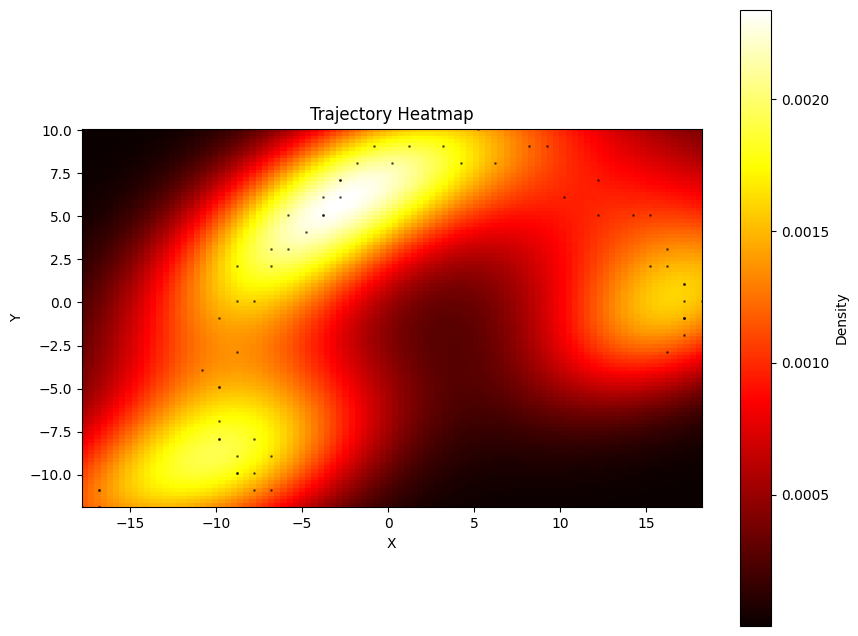

In [13]:
generate_heatmap(cen_traj[id_0])

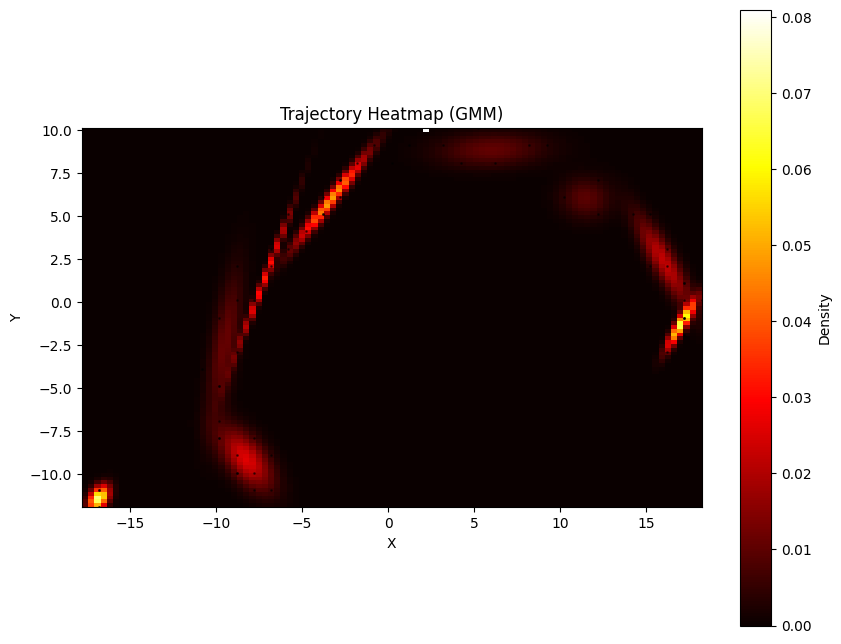

In [16]:
generate_heatmap_gmm(cen_traj[id_0])

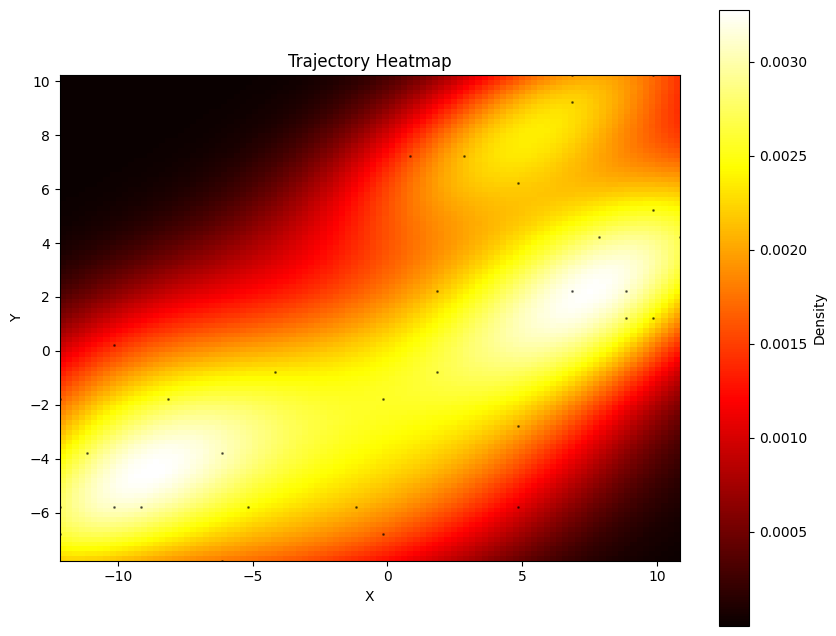

In [18]:
id_1 = 22295
generate_heatmap(cen_traj[id_1])

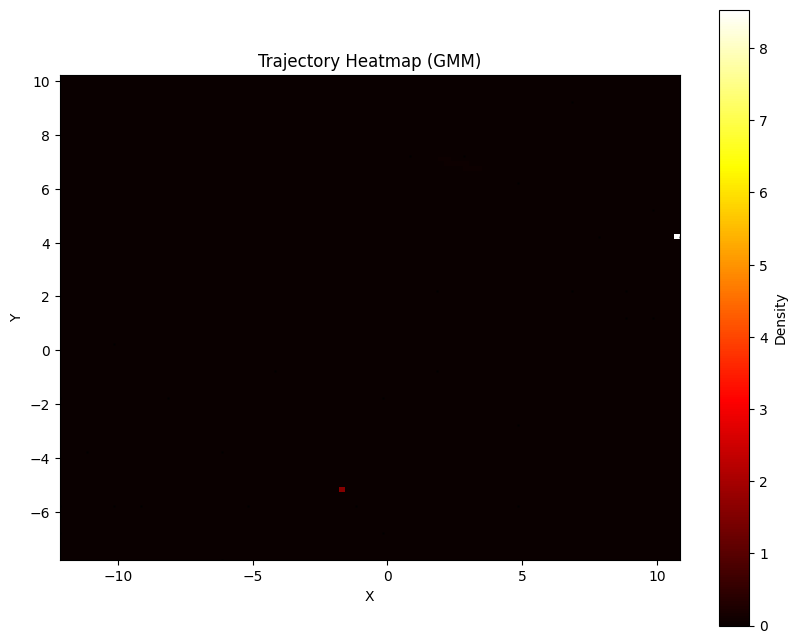

In [19]:
generate_heatmap_gmm(cen_traj[id_1])

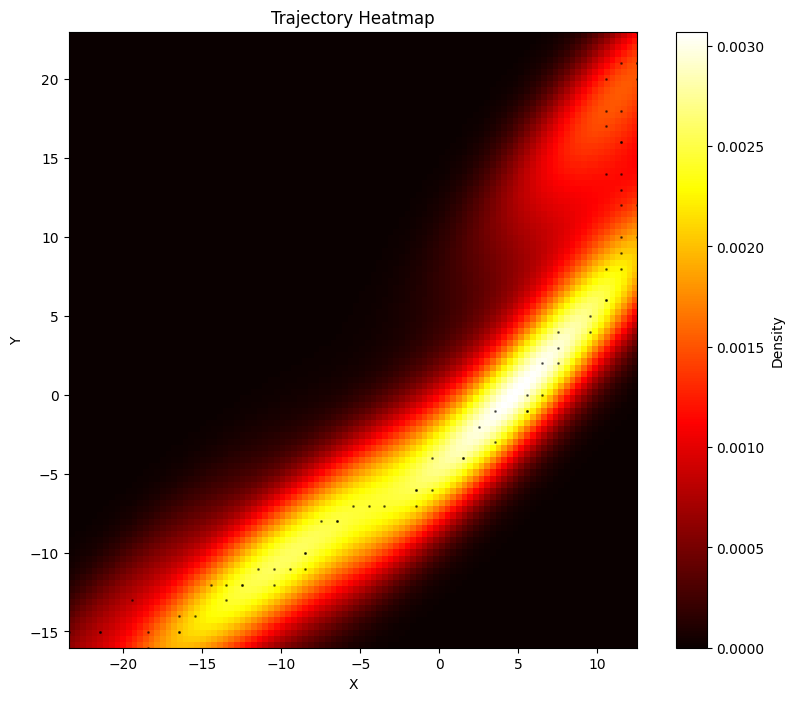

In [20]:
id_2 = 17271
generate_heatmap(cen_traj[id_2])

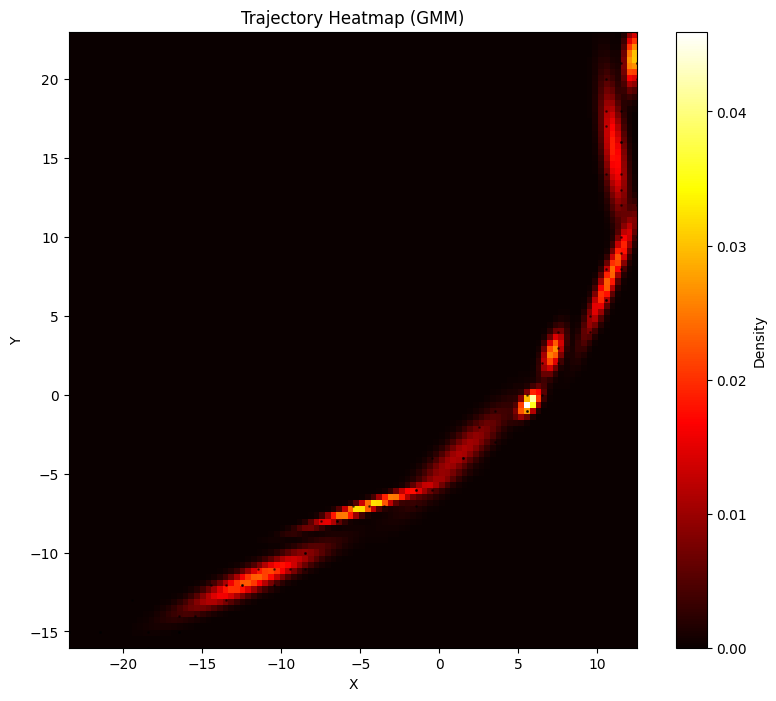

In [21]:
generate_heatmap_gmm(cen_traj[id_2])

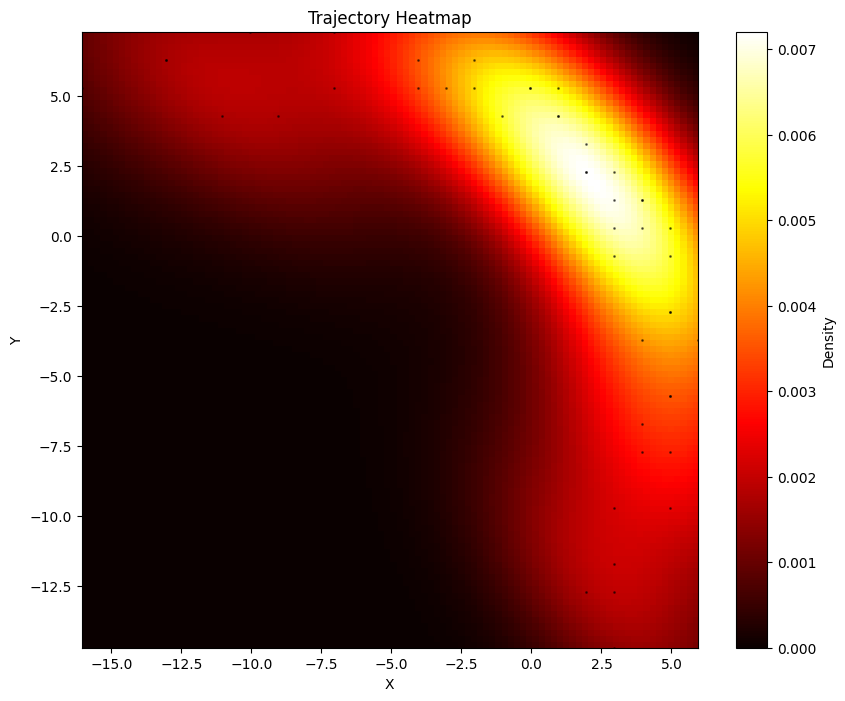

In [22]:
id_3 = 24680
generate_heatmap(cen_traj[id_3])

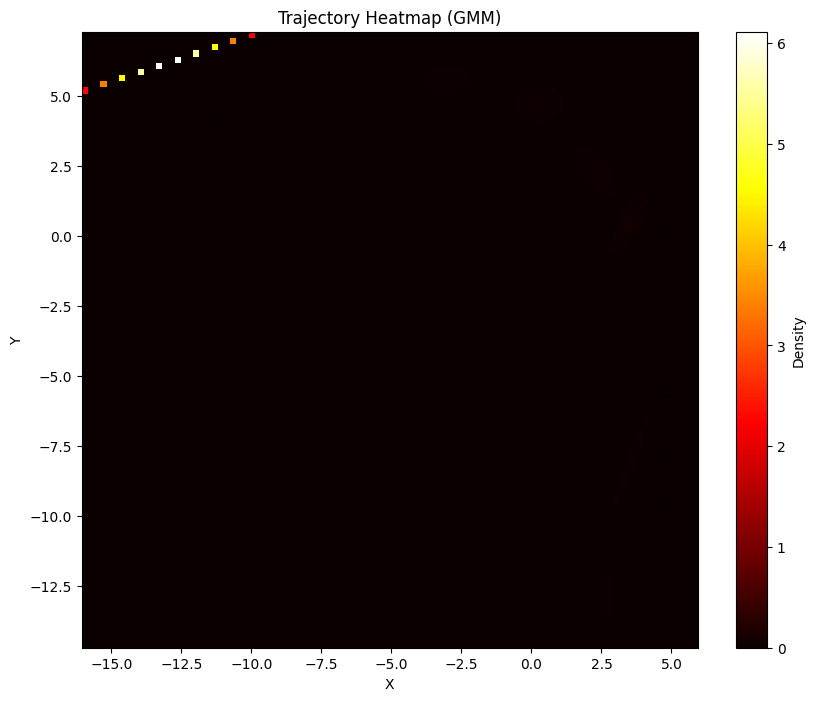

In [23]:
generate_heatmap_gmm(cen_traj[id_3])